Import the Dependencies 

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection & Analysis 💹

In [3]:
# -- loading the data from csv file to pandas DataFrame 
insurance_dataset = pd.read_csv("./insurance.csv")

In [4]:
# -- 1st five rows of the dataset 
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# -- total number of rows and columns
insurance_dataset.shape

(1338, 7)

In [6]:
# -- information about the dataset 
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features
- Sex 
- Smoker
- Region

In [7]:
# -- check for missing values 
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Analysis 📉

In [8]:
# -- statistical measures of the dataset 
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


c:\Users\AHOR ISAAC\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


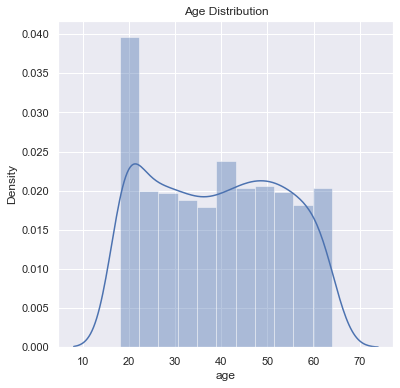

In [9]:
# -- distribution of age values 
sns.set()
plt.figure(figsize=(6, 6))
sns.distplot(insurance_dataset['age'])
plt.title("Age Distribution")
plt.show()

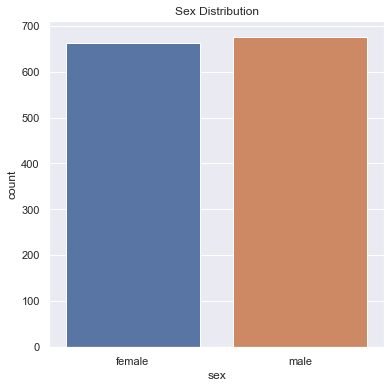

In [10]:
# -- gender column 
plt.figure(figsize=(6, 6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title("Sex Distribution")
plt.show()

In [11]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

c:\Users\AHOR ISAAC\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


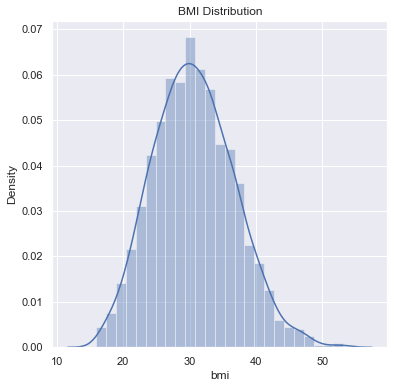

In [12]:
# -- bmi distribution 
sns.set()
plt.figure(figsize=(6, 6))
sns.distplot(insurance_dataset['bmi'])
plt.title("BMI Distribution")
plt.show()

### BMI
BMI is calculated using the __height__ and __weight__ of a person.

Normal BMI Range ➡️ 18.5 - 24.9

BMI < 18.5 ➡️ _Underweight_

BMI > 24.9 ➡️ _Overweight_

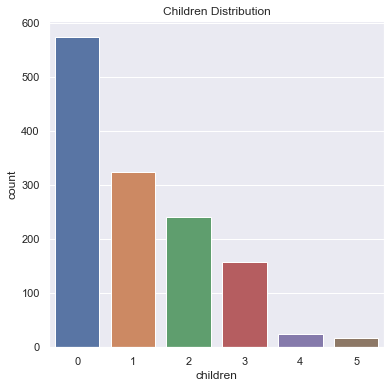

In [13]:
# -- children column 
plt.figure(figsize=(6, 6))
sns.countplot(x='children', data=insurance_dataset)
plt.title("Children Distribution")
plt.show()

In [14]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

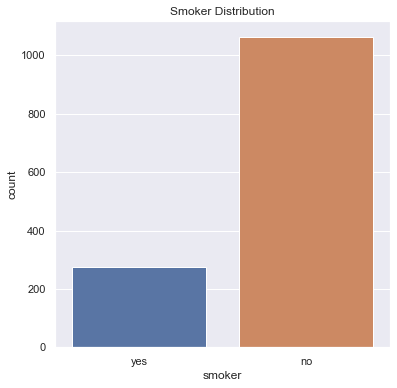

In [15]:
# -- smoker column 
plt.figure(figsize=(6, 6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title("Smoker Distribution")
plt.show()

In [16]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

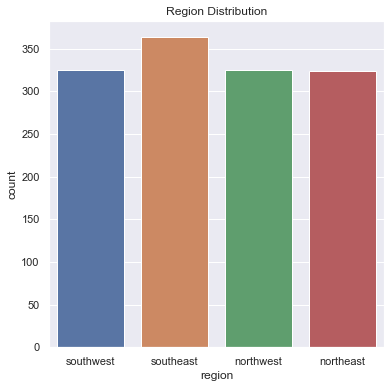

In [17]:
# -- region column 
plt.figure(figsize=(6, 6))
sns.countplot(x='region', data=insurance_dataset)
plt.title("Region Distribution")
plt.show()

In [18]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

c:\Users\AHOR ISAAC\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


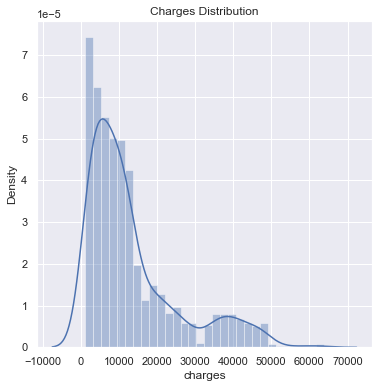

In [19]:
# -- charges distribution 
sns.set()
plt.figure(figsize=(6, 6))
sns.distplot(insurance_dataset['charges'])
plt.title("Charges Distribution")
plt.show()

Data Preprocessing 

<small>Encoding the categorical data </small>

In [20]:
# -- encoding `sex` column 
insurance_dataset.replace({'sex': {'male':0, 'female': 1}}, inplace=True)

# -- encoding `smoker` column 
insurance_dataset.replace({'smoker': {'yes': 0, 'no': 1}}, inplace=True)

# -- encoding `region` column
insurance_dataset.replace({'region': 
    {'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3}}, inplace=True)

Splitting the Feature & Target Data

In [21]:
X = insurance_dataset.drop(columns='charges')
y = insurance_dataset['charges']

In [22]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [23]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

Split the data in __Training__ and __Test__ Data.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [25]:
print("X Shape")
print("Original : {} \nTraining : {} \nTest : {}".format(X.shape, X_train.shape, X_test.shape))

X Shape
Original : (1338, 6) 
Training : (1070, 6) 
Test : (268, 6)


Model Training 

Linear Regression

In [26]:
# -- load the linear regression model
regressor = LinearRegression()

In [27]:
regressor.fit(X_train, y_train)

LinearRegression()

Model Evaluation

In [28]:
# -- prediction on training data 
pred_training_data = regressor.predict(X_train)

In [30]:
# -- R Squared Value 
r2_train = metrics.r2_score(y_train, pred_training_data)
print("R Squared Value : {}".format(r2_train))

R Squared Value : 0.751505643411174


In [31]:
# -- prediction on test data 
pred_test_data = regressor.predict(X_test)

In [32]:
# -- R Squared Value 
r2_test = metrics.r2_score(y_test, pred_test_data)
print("R Squared Value : {}".format(r2_test))

R Squared Value : 0.7447273869684077
